In [1]:
import random
random.seed(42)

import numpy as np
np.random.seed(42)


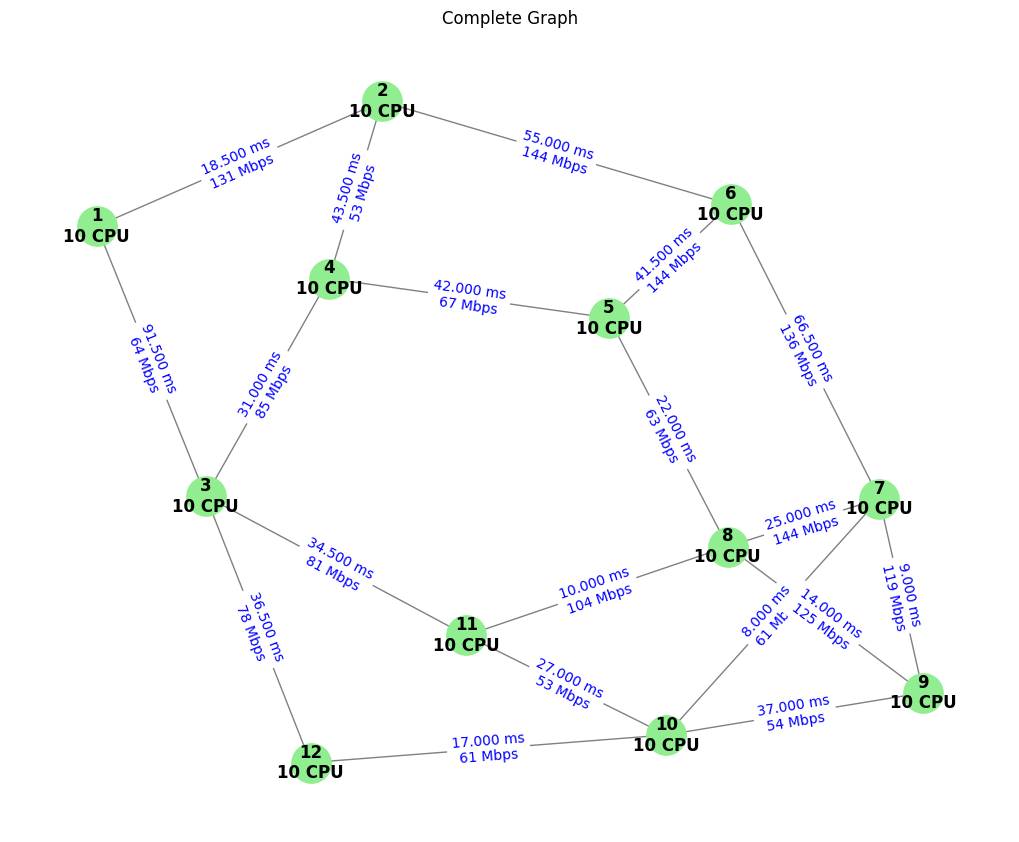

In [2]:
from topology import generate_complete_graph, draw_graph, topologie_finlande

G = topologie_finlande()
draw_graph(G)


In [3]:
G = topologie_finlande()
node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}
link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}

In [4]:
from generate_slices import generate_random_slices, vnf_profiles
from a_star import run_astar
from run_abo_full_batch import run_abo_full_batch
from run_fabo_full_batch import run_fabo_full_batch
from first_fit import run_first_fit
from best_fit import run_best_fit
G = topologie_finlande()



In [5]:
slices = [

    # Slice 0
    (
        [
            {"id": "vnf0_0", "cpu": 2, "throughput": 40, "slice": 0},
            {"id": "vnf0_1", "cpu": 2, "throughput": 40, "slice": 0},
            {"id": "vnf0_2", "cpu": 2, "throughput": 40, "slice": 0},
        ],
        [
            {"from": "vnf0_0", "to": "vnf0_1", "bandwidth": 40, "latency": 100},
            {"from": "vnf0_1", "to": "vnf0_2", "bandwidth": 40, "latency": 100},
        ]
    ),

    # Slice 1
    (
        [
            {"id": "vnf1_0", "cpu": 2, "throughput": 40, "slice": 1},
            {"id": "vnf1_1", "cpu": 2, "throughput": 40, "slice": 1},
            {"id": "vnf1_2", "cpu": 2, "throughput": 40, "slice": 1},
        ],
        [
            {"from": "vnf1_0", "to": "vnf1_1", "bandwidth": 40, "latency": 100},
            {"from": "vnf1_1", "to": "vnf1_2", "bandwidth": 40, "latency": 100},
        ]
    ),

    # Slice 2
    (
        [
            {"id": "vnf2_0", "cpu": 2, "throughput": 30, "slice": 2},
            {"id": "vnf2_1", "cpu": 2, "throughput": 30, "slice": 2},
            {"id": "vnf2_2", "cpu": 2, "throughput": 30, "slice": 2},
        ],
        [
            {"from": "vnf2_0", "to": "vnf2_1", "bandwidth": 30, "latency": 120},
            {"from": "vnf2_1", "to": "vnf2_2", "bandwidth": 30, "latency": 120},
        ]
    ),

    # Slice 3
    (
        [
            {"id": "vnf3_0", "cpu": 2, "throughput": 50, "slice": 3},
            {"id": "vnf3_1", "cpu": 2, "throughput": 50, "slice": 3},
            {"id": "vnf3_2", "cpu": 2, "throughput": 50, "slice": 3},
        ],
        [
            {"from": "vnf3_0", "to": "vnf3_1", "bandwidth": 50, "latency": 120},
            {"from": "vnf3_1", "to": "vnf3_2", "bandwidth": 50, "latency": 120},
        ]
    ),

    # Slice 4
    (
        [
            {"id": "vnf4_0", "cpu": 3, "throughput": 60, "slice": 4},
            {"id": "vnf4_1", "cpu": 3, "throughput": 60, "slice": 4},
            {"id": "vnf4_2", "cpu": 3, "throughput": 60, "slice": 4},
        ],
        [
            {"from": "vnf4_0", "to": "vnf4_1", "bandwidth": 60, "latency": 150},
            {"from": "vnf4_1", "to": "vnf4_2", "bandwidth": 60, "latency": 150},
        ]
    ),

    # Slice 5
    (
        [
            {"id": "vnf5_0", "cpu": 4, "throughput": 70, "slice": 5},
            {"id": "vnf5_1", "cpu": 4, "throughput": 70, "slice": 5},
            {"id": "vnf5_2", "cpu": 4, "throughput": 70, "slice": 5},
        ],
        [
            {"from": "vnf5_0", "to": "vnf5_1", "bandwidth": 70, "latency": 180},
            {"from": "vnf5_1", "to": "vnf5_2", "bandwidth": 70, "latency": 180},
        ]
    ),
]


In [6]:
slices = [

    # Slice 0
    (
        [
            {"id": "vnf0_0", "cpu": 1, "throughput": 20, "slice": 0},
            {"id": "vnf0_1", "cpu": 1, "throughput": 20, "slice": 0},
            {"id": "vnf0_2", "cpu": 1, "throughput": 20, "slice": 0},
        ],
        [
            {"from": "vnf0_0", "to": "vnf0_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf0_1", "to": "vnf0_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 1
    (
        [
            {"id": "vnf1_0", "cpu": 1, "throughput": 20, "slice": 1},
            {"id": "vnf1_1", "cpu": 1, "throughput": 20, "slice": 1},
            {"id": "vnf1_2", "cpu": 1, "throughput": 20, "slice": 1},
        ],
        [
            {"from": "vnf1_0", "to": "vnf1_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf1_1", "to": "vnf1_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 2
    (
        [
            {"id": "vnf2_0", "cpu": 1, "throughput": 20, "slice": 2},
            {"id": "vnf2_1", "cpu": 1, "throughput": 20, "slice": 2},
            {"id": "vnf2_2", "cpu": 1, "throughput": 20, "slice": 2},
        ],
        [
            {"from": "vnf2_0", "to": "vnf2_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf2_1", "to": "vnf2_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 3
    (
        [
            {"id": "vnf3_0", "cpu": 1, "throughput": 20, "slice": 3},
            {"id": "vnf3_1", "cpu": 1, "throughput": 20, "slice": 3},
            {"id": "vnf3_2", "cpu": 1, "throughput": 20, "slice": 3},
        ],
        [
            {"from": "vnf3_0", "to": "vnf3_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf3_1", "to": "vnf3_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 4
    (
        [
            {"id": "vnf4_0", "cpu": 1, "throughput": 20, "slice": 4},
            {"id": "vnf4_1", "cpu": 1, "throughput": 20, "slice": 4},
            {"id": "vnf4_2", "cpu": 1, "throughput": 20, "slice": 4},
        ],
        [
            {"from": "vnf4_0", "to": "vnf4_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf4_1", "to": "vnf4_2", "bandwidth": 20, "latency": 200},
        ]
    ),

    # Slice 5
    (
        [
            {"id": "vnf5_0", "cpu": 1, "throughput": 20, "slice": 5},
            {"id": "vnf5_1", "cpu": 1, "throughput": 20, "slice": 5},
            {"id": "vnf5_2", "cpu": 1, "throughput": 20, "slice": 5},
        ],
        [
            {"from": "vnf5_0", "to": "vnf5_1", "bandwidth": 20, "latency": 200},
            {"from": "vnf5_1", "to": "vnf5_2", "bandwidth": 20, "latency": 200},
        ]
    ),
]


In [7]:
node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}
link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}
link_capacity_base.update({(v, u): G[u][v]["bandwidth"] for u, v in G.edges})
link_latency = {(u, v): G[u][v]["latency"] for u, v in G.edges}
link_latency.update({(v, u): G[u][v]["latency"] for u, v in G.edges})



In [8]:
from copy import deepcopy

slices = deepcopy(slices)


In [9]:

df_astar, results_astar = run_astar(G, slices, node_capacity_base, link_capacity_base)
df_astar

,slice,accepted,g_cost
0,1,True,17.0
1,2,True,17.0
2,3,True,17.0
3,4,True,17.0
4,5,True,17.0
5,6,True,17.0


In [10]:
df_abo, abo_results = run_abo_full_batch(G, slices, node_capacity_base, link_latency ,link_capacity_base)
df_abo

,slice,accepted,g_cost
0,1,True,63.0
1,2,True,63.0
2,3,True,64.0
3,4,True,75.0
4,5,True,75.0
5,6,True,75.0


In [11]:
df_fabo, fabo_results = run_fabo_full_batch(G, slices, node_capacity_base, link_latency, link_capacity_base)
df_fabo

Running FABO:   0%|          | 0/6 [00:00<?, ?slice/s]

Running FABO: 100%|██████████| 6/6 [00:00<00:00, 21.94slice/s]


,slice,accepted,g_cost
0,1,True,40.0
1,2,True,40.0
2,3,True,40.0
3,4,True,40.0
4,5,True,40.0
5,6,True,40.0


In [12]:
df_ff, ff_results = run_first_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)
df_ff

🔄 Starting Slice 1
✅ Placed vnf0_0 on Node 1
✅ Placed vnf0_1 on Node 2
→ Routed VL vnf0_0->vnf0_1 via [1, 2]
✅ Placed vnf0_2 on Node 3
→ Routed VL vnf0_1->vnf0_2 via [2, 4, 3]
🔄 Starting Slice 2
✅ Placed vnf1_0 on Node 1
✅ Placed vnf1_1 on Node 2
→ Routed VL vnf1_0->vnf1_1 via [1, 2]
✅ Placed vnf1_2 on Node 3
→ Routed VL vnf1_1->vnf1_2 via [2, 4, 3]
🔄 Starting Slice 3
✅ Placed vnf2_0 on Node 1
✅ Placed vnf2_1 on Node 2
→ Routed VL vnf2_0->vnf2_1 via [1, 2]
✅ Placed vnf2_2 on Node 3
→ Routed VL vnf2_1->vnf2_2 via [2, 4, 3]
🔄 Starting Slice 4
✅ Placed vnf3_0 on Node 1
✅ Placed vnf3_1 on Node 2
→ Routed VL vnf3_0->vnf3_1 via [1, 2]
✅ Placed vnf3_2 on Node 3
❌ Not enough bandwidth for VL vnf3_1->vnf3_2
🔄 Starting Slice 5
✅ Placed vnf4_0 on Node 1
✅ Placed vnf4_1 on Node 2
→ Routed VL vnf4_0->vnf4_1 via [1, 2]
✅ Placed vnf4_2 on Node 3
❌ Not enough bandwidth for VL vnf4_1->vnf4_2
🔄 Starting Slice 6
✅ Placed vnf5_0 on Node 1
✅ Placed vnf5_1 on Node 2
→ Routed VL vnf5_0->vnf5_1 via [1, 2]
✅ P

,slice,accepted
0,1,True
1,2,True
2,3,True
3,4,False
4,5,False
5,6,False


In [13]:
df_bestfit, bestfit_results = run_best_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)
df_bestfit


🔄 Processing Slice 1

🔄 Processing Slice 2

🔄 Processing Slice 3

🔄 Processing Slice 4

🔄 Processing Slice 5

🔄 Processing Slice 6


,slice,accepted,g_cost
0,1,True,93.0
1,2,True,93.0
2,3,True,93.0
3,4,True,62.0
4,5,True,73.5
5,6,True,73.5


,Method,Slices Accepted,Total Slices,Acceptance Rate,Total CPU utilized
0,A*,6,6,1.0,18
1,ABO,6,6,1.0,18
2,FABO,6,6,1.0,18
3,First Fit,3,6,0.5,9
4,Best Fit,6,6,1.0,18


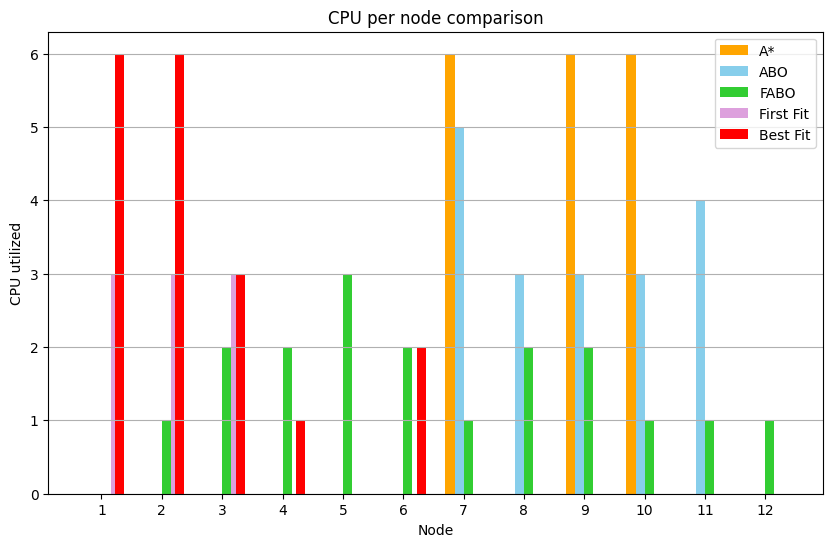

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

node_capacity = {n: 10 for n in range(1, 13)}

def process_results(results, method_name, slices):
    used_node_capacity = {n: 0 for n in range(1, 13)}
    accepted_slices = 0
    cpu_total_used = 0
    per_node_details = {n: [] for n in range(1, 13)}

    for slice_id, result in enumerate(results):
        if result:
            accepted_slices += 1
            vnf_chain = slices[slice_id][0]
            vnf_cpu_map = {vnf["id"]: vnf["cpu"] for vnf in vnf_chain}

            for vnf_id, node in result.placed_vnfs.items():
                slice_id = int(vnf_id.split("_")[0][-1])
                vnf_index = int(vnf_id.split("_")[1])
                vnf_cpu = slices[slice_id][0][vnf_index]["cpu"]

                used_node_capacity[node] += vnf_cpu
                cpu_total_used += vnf_cpu
                per_node_details[node].append(vnf_id)

    total = len(results) if results else 1  

    return {
        "method": method_name,
        "accepted": accepted_slices,
        "total": len(results),
        "rate": accepted_slices / total,
        "cpu": cpu_total_used,
        "usage": used_node_capacity,
        "vnfs": per_node_details
    }


# Process all methods (make sure these variables exist)
methods_data = []
if 'results_astar' in globals():
    methods_data.append(process_results(results_astar, "A*", slices))
if 'abo_results' in globals():
    methods_data.append(process_results(abo_results, "ABO", slices))
if 'fabo_results' in globals():
    methods_data.append(process_results(fabo_results, "FABO", slices))
if 'ff_results' in globals():
    methods_data.append(process_results(ff_results, "First Fit", slices))
if 'bestfit_results' in globals():
    methods_data.append(process_results(bestfit_results, "Best Fit", slices))

for method in methods_data:
    for node, cpu_used in method["usage"].items():
        if cpu_used > node_capacity[node]:
            print(f"❌ Overcapacity in method {method['method']} on node {node}: {cpu_used} > {node_capacity[node]}")


# Build summary table
summary_table = pd.DataFrame([
    {
        "Method": data["method"],
        "Slices Accepted": data["accepted"],
        "Total Slices": data["total"],
        "Acceptance Rate": round(data["rate"], 2),
        "Total CPU utilized": data["cpu"]
    }
    for data in methods_data
])
display(summary_table)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
nodes = list(node_capacity.keys())
bar_width = 0.15
colors = ["orange", "skyblue", "limegreen", "plum", "red"]
offsets = [-1.5, -0.5, 0.5, 1.5, 2.0]

for idx, data in enumerate(methods_data):
    usage = [data["usage"][n] for n in nodes]
    positions = [n + offsets[idx]*bar_width for n in nodes]
    ax.bar(positions, usage, width=bar_width, label=data["method"], color=colors[idx % len(colors)])

ax.set_title("CPU per node comparison")
ax.set_xlabel("Node")
ax.set_ylabel("CPU utilized")
ax.set_xticks(nodes)
ax.legend()
plt.grid(axis='y')
plt.show()


In [15]:
from compute_energy import (
    compute_energy_per_node,
    compute_total_bandwidth,
    compute_total_latency,
    compute_energy_per_slice,
    compute_total_energy_with_routing
)

# Compute energy, bandwidth and latency for all methods
method_results = {
    "A*": results_astar,
    "ABO": abo_results,
    "FABO": fabo_results,
    "First Fit": ff_results,
    "Best-fit": bestfit_results
}

comparison_rows = []
for method_name, result_list in method_results.items():
    if not result_list:
        continue

    energy_per_slice, _ = compute_energy_per_slice(result_list, slices, node_capacity_base)
    _, total_energy = compute_energy_per_node(result_list, slices, node_capacity_base)
    total_bw = compute_total_bandwidth(result_list, slices)
    total_lat = compute_total_latency(result_list, link_latency)
    
    total_energy_with_routing = sum(
        compute_total_energy_with_routing(r, slices, node_capacity_base, G)
        for r in result_list if r is not None
    )
       
    comparison_rows.append({
        "Method": method_name,
        "Slices Accepted": sum(1 for e in energy_per_slice if e is not None),
        "Total Energy": total_energy,
        "Total Bandwidth": sum(b for b in total_bw if b is not None),
        "Total Latency": sum(l for l in total_lat if l is not None),
     
    })

df_metrics = pd.DataFrame(comparison_rows)
display(df_metrics)


,Method,Slices Accepted,Total Energy,Total Bandwidth,Total Latency
0,A*,6,51,240,102.0
1,ABO,6,61,240,175.0
2,FABO,6,91,240,396.0
3,First Fit,3,33,120,279.0
4,Best-fit,6,61,240,488.0
